#### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Datasets

In [2]:
train = pd.read_csv('../data/train_cleaned.csv')
test = pd.read_csv('../data/test_cleaned.csv')

In [3]:
train.head()

,ID,Title,Domain,original_title,text_words,text_digit_cnt,clean_text_lem,clean_text_wrds,clean_text,title_polarity,...,char_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,1,what is good in a decision tree a large or a s...,Techniques,what is good in a decision tree a large or a s...,"['what', 'is', 'good', 'in', 'a', 'decision', ...",0,"['what', 'is', 'good', 'in', 'a', 'decision', ...","['good', 'decision', 'tree', 'large', 'small',...",good decision tree large small leaf size,0.221429,...,40,2.666667,0,0,0,0,0,0,0,0
1,2,training data only contains single positive label,Techniques,training data only contains single positive label,"['training', 'data', 'only', 'contains', 'sing...",0,"['training', 'data', 'only', 'contains', 'sing...","['training', 'data', 'contains', 'single', 'po...",training data contains single positive label,0.051948,...,44,5.500000,0,0,0,0,0,0,0,0
2,3,calculating percentage contribution of a negat...,Techniques,calculating percentage contribution of a negat...,"['calculating', 'percentage', 'contribution', ...",0,"['calculating', 'percentage', 'contribution', ...","['calculating', 'percentage', 'contribution', ...",calculating percentage contribution negative c...,-0.300000,...,54,6.750000,0,0,0,0,0,0,0,0
3,4,unable to open solution checker,Hackathons,unable to open solution checker,"['unable', 'to', 'open', 'solution', 'checker']",0,"['unable', 'to', 'open', 'solution', 'checker']","['unable', 'open', 'solution', 'checker']",unable open solution checker,-0.250000,...,28,4.666667,0,0,0,0,0,0,0,0
4,5,user name change,Misc,user name change,"['user', 'name', 'change']",0,"['user', 'name', 'change']","['user', 'name', 'change']",user name change,0.000000,...,16,4.000000,0,0,0,0,0,0,0,0


#### Checking collienearity and removing similar variables

Since we added a lot of features based on common variables, high multicollinearity is suspected. We need to eliminate highly corelated variables which have low correlation with Loan Status. These variables are noise in the data

In [4]:
upper = train.corr().where(np.triu(np.ones(train.corr().shape), k=1).astype(np.bool))

/tmp/ipykernel_65801/1918034925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper = train.corr().where(np.triu(np.ones(train.corr().shape), k=1).astype(np.bool))
/tmp/ipykernel_65801/1918034925.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train.corr().where(np.triu(np.ones(train.corr().shape), k=1).astype(np.bool))


<Axes: >

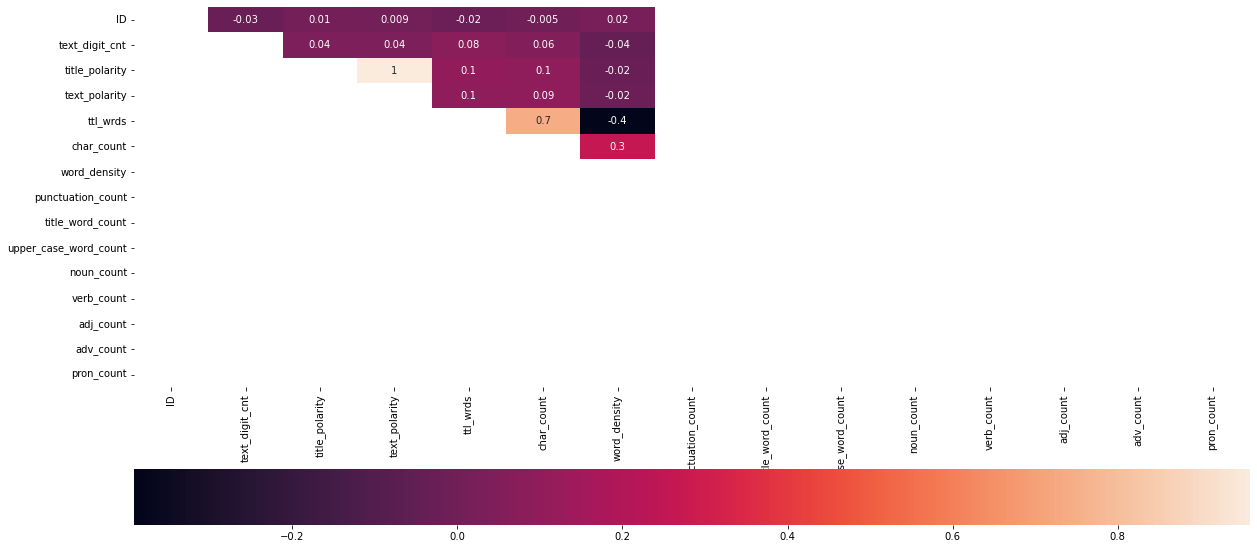

In [5]:
plt.figure(figsize = (20,10))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )